In [30]:
import sys
!{sys.executable} -m pip install sympy
import sympy

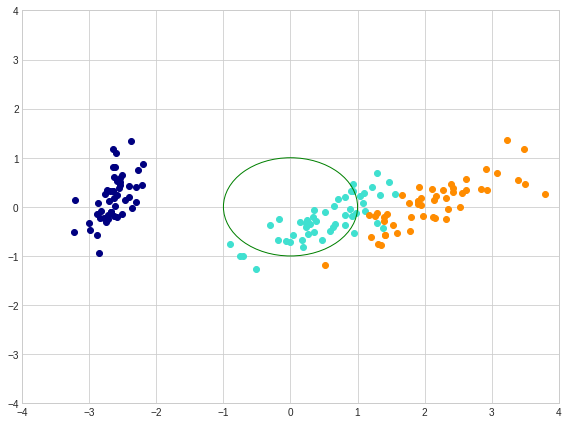

[[  2.36695311e-01   3.48372044e-16]
 [  3.48372044e-16   4.12807652e+00]]
Matrix([[0.236695311098700, 0], [0, 4.12807651935402]])
Matrix([[2.05544174529956, zoo], [zoo, 0.492182457659266]])


In [4]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn import decomposition
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv
import numpy as np
from scipy import linalg
from numpy.linalg import inv
#from sympy import *

iris = load_iris()
X = iris.data
y = iris.target
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
target_names = iris.target_names
mean_iris = X.mean(axis=0)
colors = ['navy', 'turquoise', 'darkorange']
 #fig, ax = plt.subplots()


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    #print(i)
        data = plt.scatter(X[y == i, 0], X[y == i, 1], color=color, 
            label=target_name)
    circle=plt.Circle(mean_iris, 1, color='g', fill=False)
    ax=plt.gca()
    ax.add_patch(circle)
    plt.axis([-4, 4, -4, 4])
    #plt.axis(-3,4,-3,4)
    plt.tight_layout()
    plt.show()

#X_std = StandardScaler().fit_transform(X)
#X_trans = pca.transform(X_std)
#target_names = iris.target_names
#print(X_trans)
cov_mat = np.cov(X.T)
cov_mat2 = inv(cov_mat)
print(cov_mat2)
M = Matrix(cov_mat2)
P, D = M.diagonalize()
print(D)
for i in range(2):
    for j in range(2):
        D[i,j]=1/sqrt(D[i,j])
        
print(D)
#print(linalg.sqrtm(D))    
#np.dot(P,1/sqrt(D))
#print(inv(np.matrix(D)))
#print(np.linalg.inv(D))


In [7]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KernelDensity
s = np.random.normal(0, 0.1, 1000)
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=5) 

grid.fit(s[:, None])
print(grid.best_params_)

{'bandwidth': 0.10000000000000001}


{'bandwidth': 0.34827586206896555}


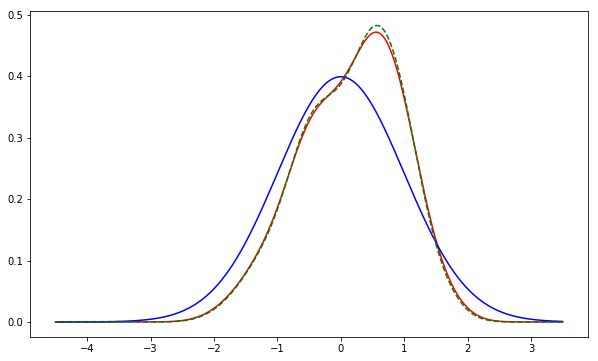

In [4]:
from sklearn.grid_search import GridSearchCV
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from scipy import stats

xgrid = np.linspace(-4.5, 3.5, 1000)

gaussian1 = 0.5 * np.random.normal(-2, 1,100)
gaussian2 = 0.5 * np.random.normal(2,1,100)

x = gaussian1 + gaussian2
#truepdf = 0.5*scipy.stats.norm(-2,1,100).pdf(xgrid) + 0.5*scipy.stats.norm(2,1,100).pdf(xgrid)

histogram, bins = np.histogram(x, bins=xgrid, normed=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
truepdf = stats.norm.pdf(bin_centers)

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=5) 
grid.fit(x[:, None])
print(grid.best_params_)
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(xgrid[:, None]))

kde = stats.gaussian_kde(x, bw_method='silverman')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(xgrid, pdf, 'r-', label='Cross-validation')
ax.plot(bin_centers, truepdf, 'b-', label='True pdf')
ax.plot(xgrid, kde(xgrid), 'g--', label="Silverman's Rule")
plt.show()
#ax.hist(x_grid, 30, fc='gray', histtype='stepfilled', alpha=0.3)
